In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from sklearn.exceptions import ConvergenceWarning

def warn(*args, **kwargs): pass
warnings.warn = warn

In [2]:
IBM_HR_analytics_dataset = pd.read_csv("WA_Fn-UseC_-HR-Employee-Attrition.csv")

In [3]:
print(IBM_HR_analytics_dataset.head())

   Age Attrition     BusinessTravel  DailyRate              Department  \
0   41       Yes      Travel_Rarely       1102                   Sales   
1   49        No  Travel_Frequently        279  Research & Development   
2   37       Yes      Travel_Rarely       1373  Research & Development   
3   33        No  Travel_Frequently       1392  Research & Development   
4   27        No      Travel_Rarely        591  Research & Development   

   DistanceFromHome  Education EducationField  EmployeeCount  EmployeeNumber  \
0                 1          2  Life Sciences              1               1   
1                 8          1  Life Sciences              1               2   
2                 2          2          Other              1               4   
3                 3          4  Life Sciences              1               5   
4                 2          1        Medical              1               7   

   ...  RelationshipSatisfaction StandardHours  StockOptionLevel  \
0  ...

In [4]:
print(IBM_HR_analytics_dataset.isna().sum())

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

In [5]:
print(IBM_HR_analytics_dataset.dtypes)

Age                          int64
Attrition                   object
BusinessTravel              object
DailyRate                    int64
Department                  object
DistanceFromHome             int64
Education                    int64
EducationField              object
EmployeeCount                int64
EmployeeNumber               int64
EnvironmentSatisfaction      int64
Gender                      object
HourlyRate                   int64
JobInvolvement               int64
JobLevel                     int64
JobRole                     object
JobSatisfaction              int64
MaritalStatus               object
MonthlyIncome                int64
MonthlyRate                  int64
NumCompaniesWorked           int64
Over18                      object
OverTime                    object
PercentSalaryHike            int64
PerformanceRating            int64
RelationshipSatisfaction     int64
StandardHours                int64
StockOptionLevel             int64
TotalWorkingYears   

In [6]:
class DataCleaning():
  def __init__(self,df):
    self.df = df
    self.cols = df.columns
    self.getLabelMaps()

  def getCols(self,condition):
    return self.df.columns[np.where(condition(self.df))]

  def getLabelMaps(self):
    label_maps = {}
    columns_to_change = self.getCols(lambda x: x.dtypes == 'object')
    for cols in columns_to_change:
      unique_elems = self.df[cols].unique()
      label_maps[cols] = dict(zip(unique_elems,range(0,len(unique_elems))))
      label_maps[cols+"_inv"] = dict(zip(range(0,len(unique_elems)),unique_elems))
    self.label_maps = label_maps
    return label_maps

  def updateDatasetLabelMap(self):
    for cols in self.label_maps:
      if "_inv" in cols: continue
      for unique in self.label_maps[cols]:
        self.df[cols].replace(unique,self.label_maps[cols][unique],inplace=True)

  def updateDatasetLabelMapInv(self):
    for cols in self.label_maps:
      if "_inv" in cols: continue
      for unique in self.label_maps[cols+"_inv"]:
        self.df[cols].replace(unique,self.label_maps[cols+"_inv"][unique],inplace=True)

  def getCorrelationMatrix(self,columns=None):
    return self.df[columns].corr() if type(columns) != "NoneType" else self.df.corr()

In [7]:
DC = DataCleaning(IBM_HR_analytics_dataset)
DC.getLabelMaps()
DC.updateDatasetLabelMap()
print(DC.df.head())

   Age  Attrition  BusinessTravel  DailyRate  Department  DistanceFromHome  \
0   41          0               0       1102           0                 1   
1   49          1               1        279           1                 8   
2   37          0               0       1373           1                 2   
3   33          1               1       1392           1                 3   
4   27          1               0        591           1                 2   

   Education  EducationField  EmployeeCount  EmployeeNumber  ...  \
0          2               0              1               1  ...   
1          1               0              1               2  ...   
2          2               1              1               4  ...   
3          4               0              1               5  ...   
4          1               2              1               7  ...   

   RelationshipSatisfaction  StandardHours  StockOptionLevel  \
0                         1             80                

In [8]:
print(DC.df.describe())

               Age    Attrition  BusinessTravel    DailyRate   Department  \
count  1470.000000  1470.000000     1470.000000  1470.000000  1470.000000   
mean     36.923810     0.838776        0.392517   802.485714     0.739456   
std       9.135373     0.367863        0.665455   403.509100     0.527792   
min      18.000000     0.000000        0.000000   102.000000     0.000000   
25%      30.000000     1.000000        0.000000   465.000000     0.000000   
50%      36.000000     1.000000        0.000000   802.000000     1.000000   
75%      43.000000     1.000000        1.000000  1157.000000     1.000000   
max      60.000000     1.000000        2.000000  1499.000000     2.000000   

       DistanceFromHome    Education  EducationField  EmployeeCount  \
count       1470.000000  1470.000000     1470.000000         1470.0   
mean           9.192517     2.912925        1.462585            1.0   
std            8.106864     1.024165        1.431780            0.0   
min            1.00000

In [9]:
print(DC.df.std())

Age                            9.135373
Attrition                      0.367863
BusinessTravel                 0.665455
DailyRate                    403.509100
Department                     0.527792
DistanceFromHome               8.106864
Education                      1.024165
EducationField                 1.431780
EmployeeCount                  0.000000
EmployeeNumber               602.024335
EnvironmentSatisfaction        1.093082
Gender                         0.490065
HourlyRate                    20.329428
JobInvolvement                 0.711561
JobLevel                       1.106940
JobRole                        2.323902
JobSatisfaction                1.102846
MaritalStatus                  0.730121
MonthlyIncome               4707.956783
MonthlyRate                 7117.786044
NumCompaniesWorked             2.498009
Over18                         0.000000
OverTime                       0.450606
PercentSalaryHike              3.659938
PerformanceRating              0.360824


In [10]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

def chi_based_columns(DC,targetColumn,k=5):
  selector = SelectKBest(chi2, k=k)
  selector.fit(DC.df.drop(targetColumn, axis=1), DC.df[targetColumn])
  significant_features = DC.df.drop(targetColumn, axis=1).columns[selector.get_support()]
  return significant_features

def correlation_matrix_based_columns(DC,targetColumn,THRESHOLD=0.1):
  corr_cols = DC.getCols(lambda x: x.std()!=0)
  cm = DC.getCorrelationMatrix(corr_cols.values)
  plt.figure(figsize=(8,8))
  sns.heatmap(cm)
  plt.show()
  significant_features = corr_cols[THRESHOLD < np.abs(cm[targetColumn])].drop(targetColumn)
  return significant_features

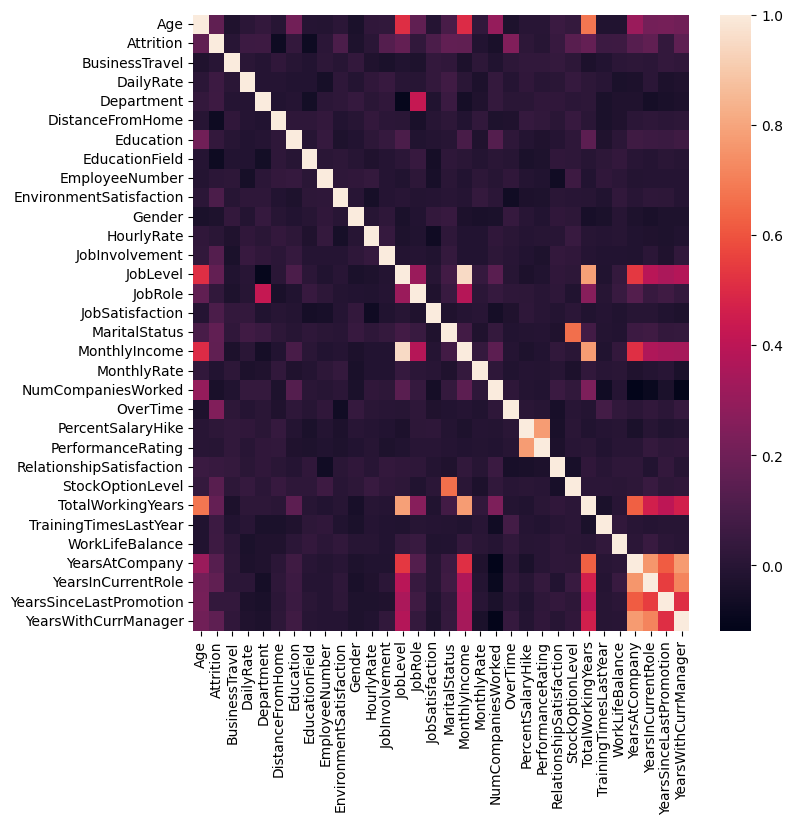

(1470,) (1470, 8)


In [11]:
targetColumn = 'Attrition'

significant_features = correlation_matrix_based_columns(DC,targetColumn,0.15)

Y = DC.df[targetColumn].copy()
X = DC.df[significant_features.values].copy()

print(Y.shape, X.shape)

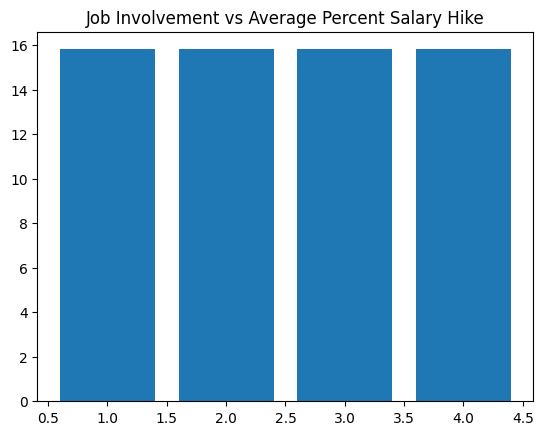

In [12]:
plt.figure()
avg_vals = []
for job_inv in DC.df['JobInvolvement'].unique():
  temp = DC.df.loc[DC.df["JobInvolvement"] == job_inv]
  avg_vals = np.mean( temp['PercentSalaryHike'] )
plt.bar(DC.df['JobInvolvement'].unique(),avg_vals)
plt.title("Job Involvement vs Average Percent Salary Hike")
plt.show()

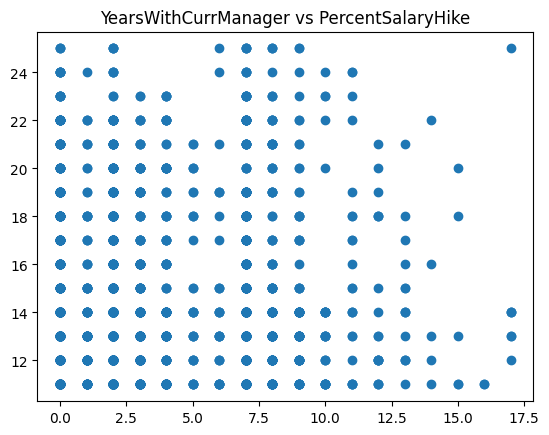

In [13]:
plt.figure()
plt.scatter(DC.df['YearsWithCurrManager'],DC.df['PercentSalaryHike'])
plt.title("YearsWithCurrManager vs PercentSalaryHike")
plt.show()

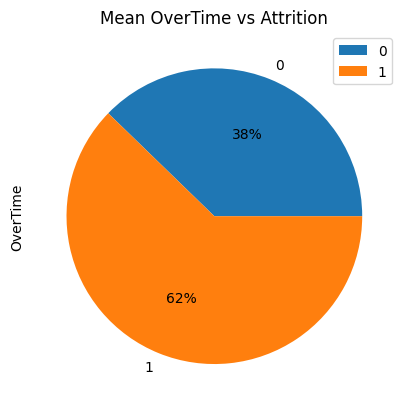

In [14]:
DC.df.groupby(['Attrition']).mean().plot(kind='pie', y='OverTime', autopct='%1.0f%%')
plt.title("Mean OverTime vs Attrition")
plt.show()

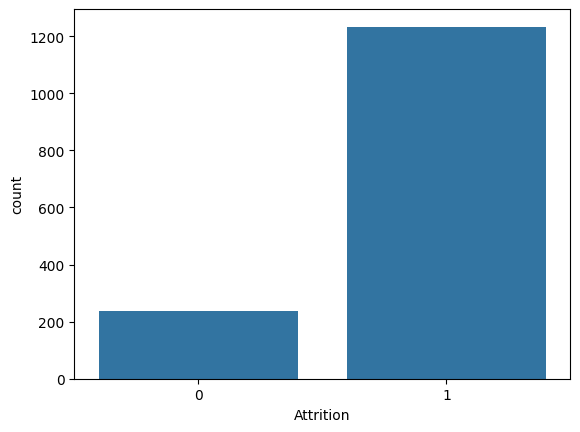

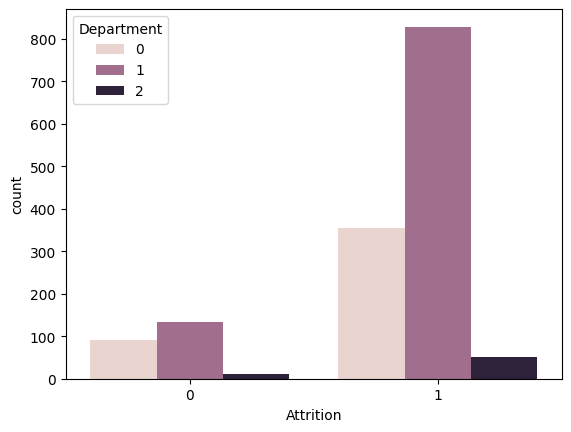

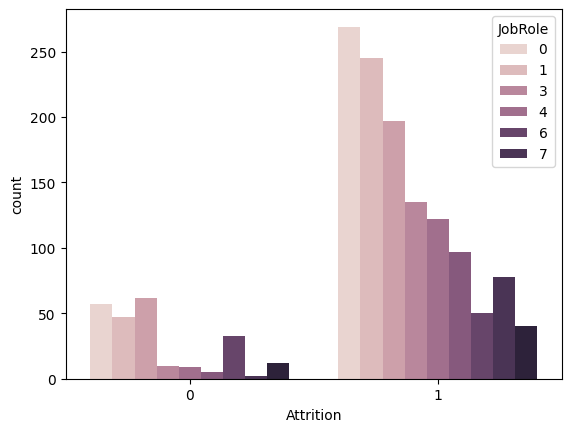

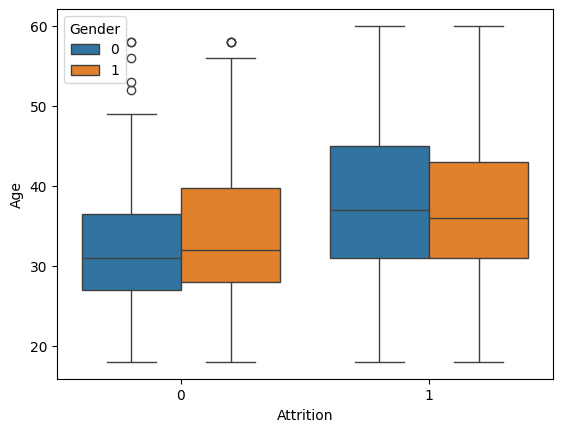

In [15]:
sns.countplot(x='Attrition', data=DC.df)
plt.show()

sns.countplot(x='Attrition', hue='Department', data=DC.df)
plt.show()

sns.countplot(x='Attrition', hue='JobRole', data=DC.df)
plt.show()

sns.boxplot(x='Attrition', y='Age', hue='Gender', data=DC.df)
plt.show()

# Tableau report

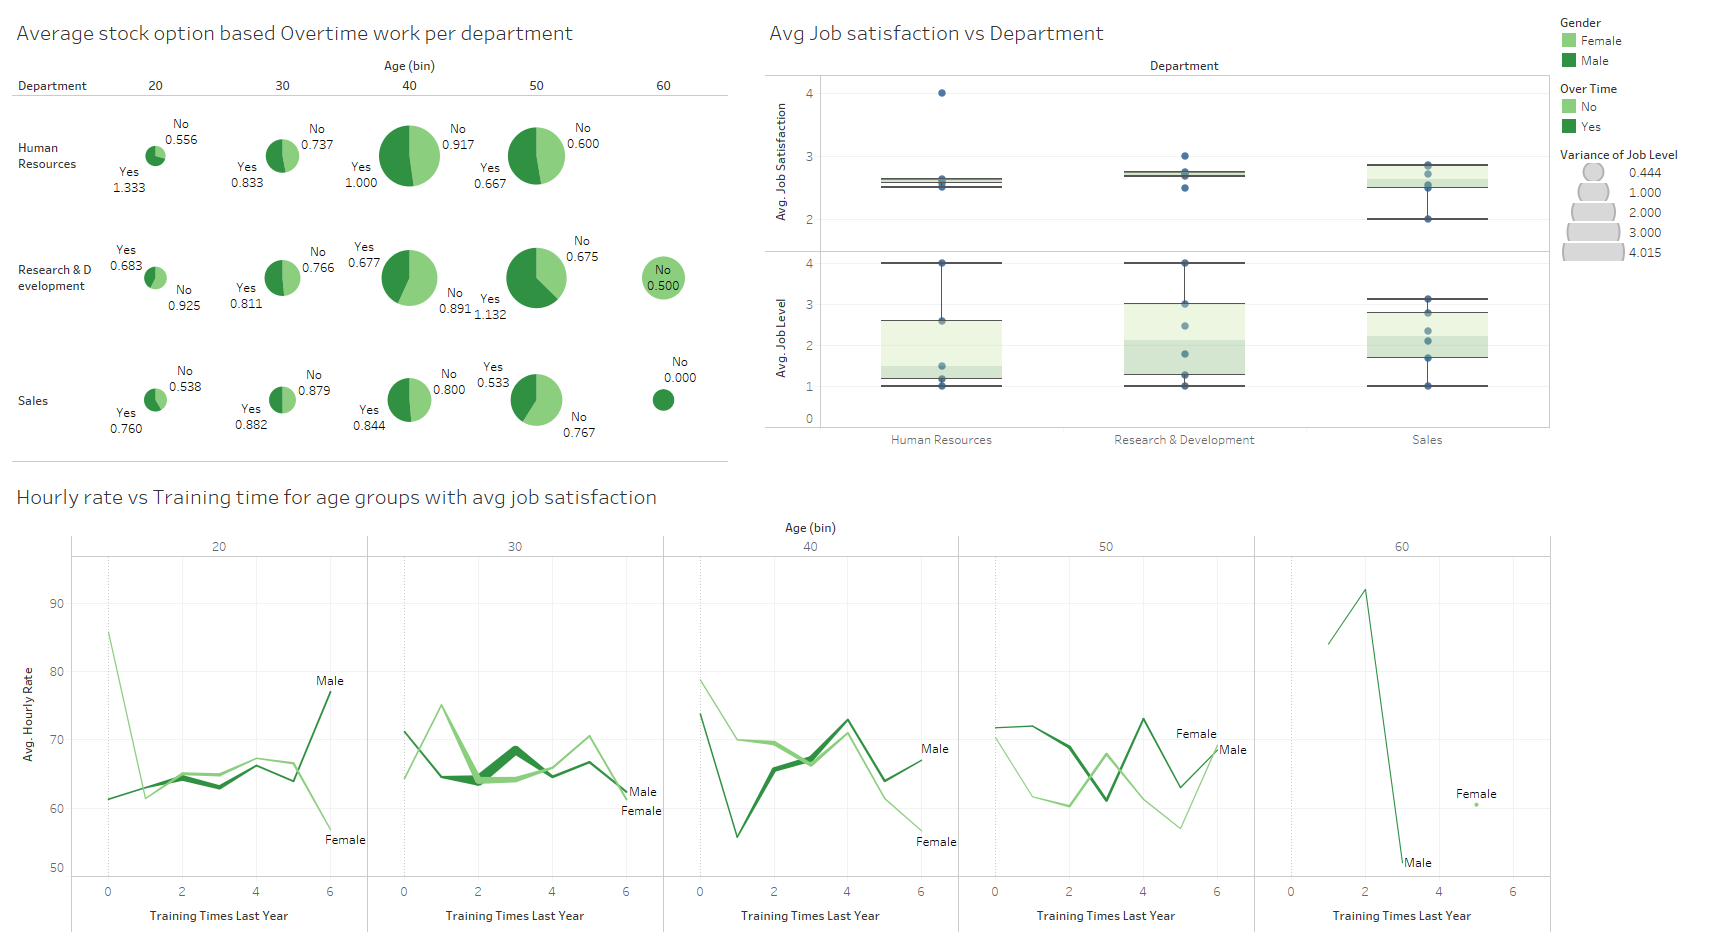


In [16]:
DC.updateDatasetLabelMapInv()
print(DC.df.head(10))

   Age Attrition     BusinessTravel  DailyRate              Department  \
0   41       Yes      Travel_Rarely       1102                   Sales   
1   49        No  Travel_Frequently        279  Research & Development   
2   37       Yes      Travel_Rarely       1373  Research & Development   
3   33        No  Travel_Frequently       1392  Research & Development   
4   27        No      Travel_Rarely        591  Research & Development   
5   32        No  Travel_Frequently       1005  Research & Development   
6   59        No      Travel_Rarely       1324  Research & Development   
7   30        No      Travel_Rarely       1358  Research & Development   
8   38        No  Travel_Frequently        216  Research & Development   
9   36        No      Travel_Rarely       1299  Research & Development   

   DistanceFromHome  Education EducationField  EmployeeCount  EmployeeNumber  \
0                 1          2  Life Sciences              1               1   
1                 8      

# Data Processing

In [17]:
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA
from sklearn.preprocessing import MinMaxScaler

class DataProcessing():
  def __init__(self):
    self.tsne = TSNE
    self.pca = PCA
    self.scaler = MinMaxScaler
    self.dim = 2

  def applyTSNE(self,data):
    tsne = self.tsne(n_components=self.dim)
    return tsne,tsne.fit_transform(data)

  def applyPCA(self,data):
    pca = self.pca(n_components=self.dim)
    return pca,pca.fit_transform(data)

  def normalize(self,data):
    scale = self.scaler()
    return scale,scale.fit_transform(data)

  def apply_processing(self,datatype,norm,d):
    self.dim = d
    norm = 0 if norm == "unscaled" else 1
    if datatype=='raw':
        return self.normalize if norm else (lambda x: (-1,x))
    elif datatype=='pca':
      return (lambda x: self.applyPCA(self.normalize(x)[1]) )if norm else self.applyPCA
    elif datatype=='tsne':
      return (lambda x: self.applyTSNE(self.normalize(x)[1])) if norm else self.applyTSNE
    else:
      raise "DataType incompatiable"

In [18]:
DP = DataProcessing()
_,X_raw = DP.apply_processing('raw','unscaled',2)(X.values)
pca,pca_components = DP.apply_processing('pca','unscaled',2)(X.values)
tsne, tsne_components = DP.apply_processing('tsne','unscaled',2)(X.values)

_, X_norm = DP.apply_processing('raw','scaled',2)(X.values)
pca_norm, pca_norm_components = DP.apply_processing('pca','scaled',2)(X.values)
tsne_norm, tsne_norm_components = DP.apply_processing('tsne','scaled',2)(X.values)

In [19]:
def plotScatterNewFigure(x,y,title,c):
  plt.figure()
  plt.scatter(x,y,c=c)
  plt.title(title)

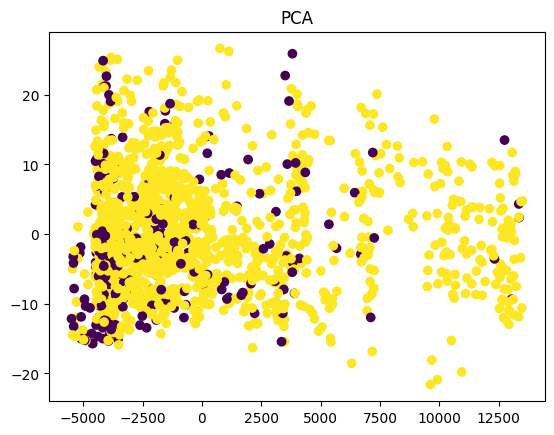

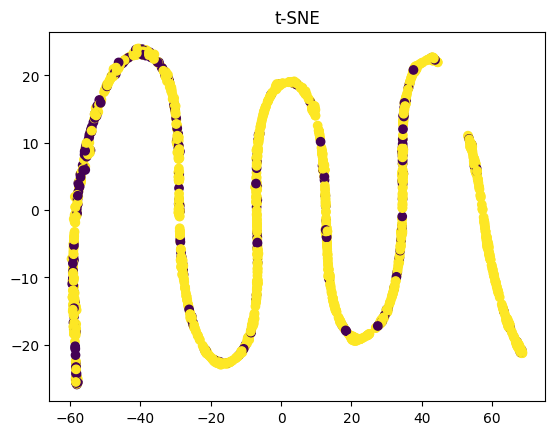

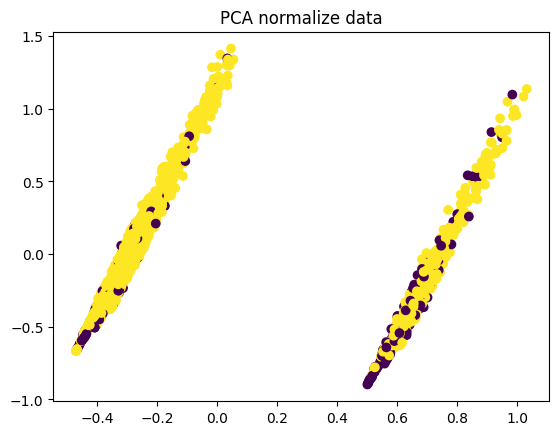

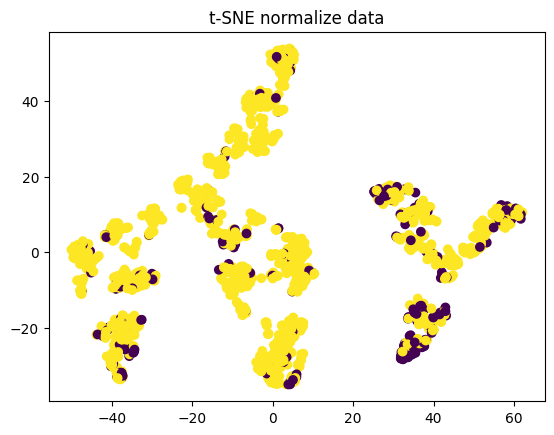

In [20]:
plotScatterNewFigure(pca_components[:,0],pca_components[:,1],"PCA",Y)
plotScatterNewFigure(tsne_components[:,0],tsne_components[:,1],"t-SNE",Y)
plotScatterNewFigure(pca_norm_components[:,0],pca_norm_components[:,1],"PCA normalize data",Y)
plotScatterNewFigure(tsne_norm_components[:,0],tsne_norm_components[:,1],"t-SNE normalize data",Y)
plt.show()

#Model Training and Selection

In [21]:
from sklearn.linear_model import LinearRegression, SGDClassifier, LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.naive_bayes import GaussianNB

from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score

In [22]:
class ModelTesting():
  def __init__(self):
    self.models = [
        "Linear Regression",
        "Logistic Regression",
        "SGD Classifier",
        "Decision Tree",
        "Random Forest",
        "MLP",
        "Gaussian Naive Bayes"
    ]
    self.metrics = [
        'accuracy',
        'precision',
        'recall',
        'f1-score'
    ]

    self.models_to_compare = [
      LinearRegression,
      LogisticRegression,
      SGDClassifier,
      DecisionTreeClassifier,
      RandomForestClassifier,
      MLPClassifier,
      GaussianNB
    ]
  def setData(self, data, Y, dataTypes, normalizations):
    self.data = data
    self.target = Y
    self.rows = dataTypes
    self.cols = normalizations

  def train_model(self,model,x_train,x_test,y_train,y_test):
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    y_pred = np.where(y_pred > 0.5, 1, 0)

    out = {
        'accuracy':accuracy_score(y_test,y_pred),
        'precision':precision_score(y_test,y_pred),
        'recall':recall_score(y_test,y_pred),
        'f1-score':f1_score(y_test,y_pred),
        'model': model
    }
    return out

  def train_all_models(self,NUM_TRAIN=1):
    results = {}
    results_table = np.zeros((len(self.models)*len(self.rows)*len(self.cols),4+len(self.metrics)),dtype='object')
    column_names = ["Model Name",'model',"data type","normalization"] + self.metrics

    i = 0
    for datatype_index, datatype in enumerate(self.rows): # for all data types
      results[datatype] = {}
      for norm_index, norm in enumerate(self.cols): # for all normalizations
        results[datatype][norm] = {}
        for mod_index, mod in enumerate(self.models_to_compare): # for all models to compare
          res = {}
          for num_train in range(0,NUM_TRAIN): # run every model NUM_TRAIN times and take the average of each metric
            model = mod() # creates a new instantce of model
            out_res = self.train_model( model, *train_test_split(self.data[datatype_index][norm_index], self.target, test_size=0.33))
            # average the results by added the scaled output to res
            for key in out_res:
              if key!="model":
                out_res[key] = out_res[key]/NUM_TRAIN
            res = out_res if num_train == 0 else {i:res[i]+out_res[i] for i in res.keys() if i != "model"}
            res['model'] = out_res['model']

          results[datatype][norm][self.models[mod_index]] = res # add to hash map
          # add to table
          results_table[i,0] = self.models[mod_index]
          results_table[i,1] = res['model']
          results_table[i,2] = datatype
          results_table[i,3] = norm
          k = 0;
          for metric in self.metrics:
            results_table[i,4+k] = results[datatype][norm][self.models[mod_index]][metric]
            k+=1
          i+=1

    self.results = results # store result in hash map
    self.results_table = pd.DataFrame(results_table,columns = column_names) # store result in table for visulization

In [23]:
data = [ # rows are raw, pca, tsne and columns are unscaled and scaled data
    [X_raw              , X_norm],
    [pca_components  , pca_norm_components],
    [tsne_components , tsne_norm_components]
]

MT = ModelTesting()
MT.setData(data, Y, ['raw','pca',"tsne"], ['unscaled','scaled'])

In [24]:
MT.train_all_models(10)

In [25]:
MT.results_table.sort_values(by=['accuracy'],ascending=False,ignore_index=True, inplace=True)
print("Top 3 models")
print(MT.results_table.head(3))

Top 3 models
            Model Name                 model data type normalization  \
0  Logistic Regression  LogisticRegression()       pca        scaled   
1  Logistic Regression  LogisticRegression()       raw        scaled   
2                  MLP       MLPClassifier()       pca        scaled   

   accuracy precision    recall  f1-score  
0  0.857202   0.86077    0.9915  0.921423  
1  0.856584  0.861929  0.988103  0.920595  
2  0.852263  0.864139  0.978042  0.917321  


# Hyperparameter Tuning for top models

In [26]:
from sklearn.model_selection import GridSearchCV

def hyperparameter_tuning(top_models:pd.DataFrame, N: int):
  models = [ # define all models
    LinearRegression, LogisticRegression, SGDClassifier,
    DecisionTreeClassifier, RandomForestClassifier,
    MLPClassifier, GaussianNB
  ]
  parameters = [ # define parametr space fo reach of the models
      {},
      {'C':[0.001,0.01,0.1,1,10,100], "solver":['lbfgs', "liblinear", 'newton-cg', 'newton-cholesky', 'sag', 'saga']},
      {'loss':['hinge', 'log_loss', 'modified_huber', 'squared_hinge', 'perceptron', 'squared_error', 'huber', 'epsilon_insensitive', 'squared_epsilon_insensitive']},
      {'criterion':['gini','entropy'],'max_depth':[4,5,6,7,8,9,10,11,12,15,20,30,40,50,70,90,120,150]},
      {'bootstrap': [True, False],'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, None],'max_features': ['auto', 'sqrt'],'min_samples_leaf':[1, 2, 4],
      'min_samples_split': [2, 5, 10],'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000]},
      {'hidden_layer_sizes': [(10),(20),(10,10),(10,20),(20,10),(20,20)],'activation': ['tanh', 'relu'],'solver': ['sgd', 'adam'],'alpha': [0.0001, 0.05],'learning_rate': ['constant','adaptive']},
      {'var_smoothing': np.logspace(0,-9, num=100)}
  ]
  # create a neo model to store the results in
  updated_table = top_models.iloc[:N].copy(deep=True)

  for model_choosen in range(0,N): # take the top N models
    # get basic values
    model_index = MT.models.index(top_models['Model Name'][model_choosen])
    model = models[model_index]()
    model_params = parameters[model_index]
    model_data_row = MT.rows.index(top_models['data type'][model_choosen])
    model_data_col = MT.cols.index(top_models['normalization'][model_choosen])

    print(model_data_row,model_data_col)

    # perform grid search on the models based on the cached data
    x_train, x_test, y_train, y_test = train_test_split(MT.data[model_data_row][model_data_col], MT.target, test_size=0.33)
    grid_search = GridSearchCV(
        estimator=model, param_grid=model_params, n_jobs=-1,cv=10,scoring='accuracy')
    with warnings.catch_warnings():
      warnings.simplefilter('ignore', category=ConvergenceWarning)
      grid_search.fit(x_train, y_train)
    print("Best Hyperparameters: ", grid_search.best_params_)

    # Evaluate the model on the test set
    best_model = models[model_index]()
    best_model.set_params(**grid_search.best_params_)
    new_result = MT.train_model(best_model, x_train, x_test, y_train, y_test)

    #update table only if the new model is better
    if new_result['accuracy'] > updated_table.iloc[model_choosen]['accuracy']:
      print("Found better model")
      for key in new_result.keys():
        updated_table.iloc[model_choosen][key] = new_result[key]
    print()
  return updated_table

In [27]:
updated_table = hyperparameter_tuning(MT.results_table,2) # each MLP models will take 5-6 mins

1 1
Best Hyperparameters:  {'C': 1, 'solver': 'lbfgs'}
Found better model

0 1
Best Hyperparameters:  {'C': 10, 'solver': 'liblinear'}
Found better model



In [28]:
print(updated_table)

            Model Name                                         model  \
0  Logistic Regression                       LogisticRegression(C=1)   
1  Logistic Regression  LogisticRegression(C=10, solver='liblinear')   

  data type normalization  accuracy precision    recall  f1-score  
0       pca        scaled  0.860082  0.860465   0.99511  0.922902  
1       raw        scaled   0.87037   0.87931  0.983133  0.928328  


# Ensambling the top models after hyperparameter tuning

In [29]:
class Ensamble_model():
  def __init__(self,models_arr,preprocessing_arr):
    self.models_ensemble = models_arr
    self.preprocessing_ensemble = preprocessing_arr
    self.setup = [False]*len(models_arr)

  def predict(self, x_test):
    results = []
    for i in range(len(self.models_ensemble)):
      if self.setup[i]:
        x = self.preprocessing_ensemble[i].transform(x_test)
      else:
        trained_processing_scalar,x = self.preprocessing_ensemble[i](x_test)
        self.preprocessing_ensemble[i] = trained_processing_scalar if trained_processing_scalar != -1 else self.preprocessing_ensemble[i]
        self.setup[i] = (trained_processing_scalar != -1)
      model = self.models_ensemble[i]
      results.append(model.predict(x))
    results = (np.mean(results,axis=0) > 0.5).astype(int)
    return results

  def evaluate(self, x_test, y_test):
    y_pred = self.predict(x_test)
    out = {
        'accuracy':accuracy_score(y_test,y_pred),
        'precision':precision_score(y_test,y_pred),
        'recall':recall_score(y_test,y_pred),
        'f1-score':f1_score(y_test,y_pred),
    }
    return out

  def fit(self, x_train, y_train):
    for i in range(len(self.models_ensemble)):
      if self.setup[i]:
        x = self.preprocessing_ensemble[i].transform(x_train)
      else:
        trained_processing_scalar,x = self.preprocessing_ensemble[i](x_train)
        self.preprocessing_ensemble[i] = trained_processing_scalar if trained_processing_scalar != -1 else self.preprocessing_ensemble[i]
        self.setup[i] = trained_processing_scalar != -1
      model = self.models_ensemble[i]
      model.fit(x,y_train)
      print(model.score(x_train,y_train))

In [30]:
processing_func = np.array([DP.apply_processing(updated_table['data type'][i], updated_table['normalization'][i], 2) for i in range(len(updated_table))])

In [31]:
EM = Ensamble_model(updated_table['model'].values, processing_func.copy())

In [32]:
print(EM.evaluate(X_raw,Y.values))
print(EM.setup)

{'accuracy': 0.85578231292517, 'precision': 0.8638631503920171, 'recall': 0.9829683698296837, 'f1-score': 0.9195751138088012}
[True, True]


In [33]:
# Ensamble model can also be trained like this if necessary
# EM.fit(X_raw,Y.values)
# EM.evaluate(X_raw,Y.values)

# Prediction model performance visualization
* Feature extraction methods
 - Chi^2 test
 - Correlation based
* Data processing methods
 - unscaled data
 - scaled data
 - unscaled pca
 - scaled pca
 - unscled tsne
 - scled tsne
* Predicting models
 - Linear Regression
 - Logistic Regression
 - SGD Classifier
 - Decision Tree
 - Random Forest
 - MLP
 - Gaussian Naive Bayes
 - Ensamble Models
* Hyperparameter tuning


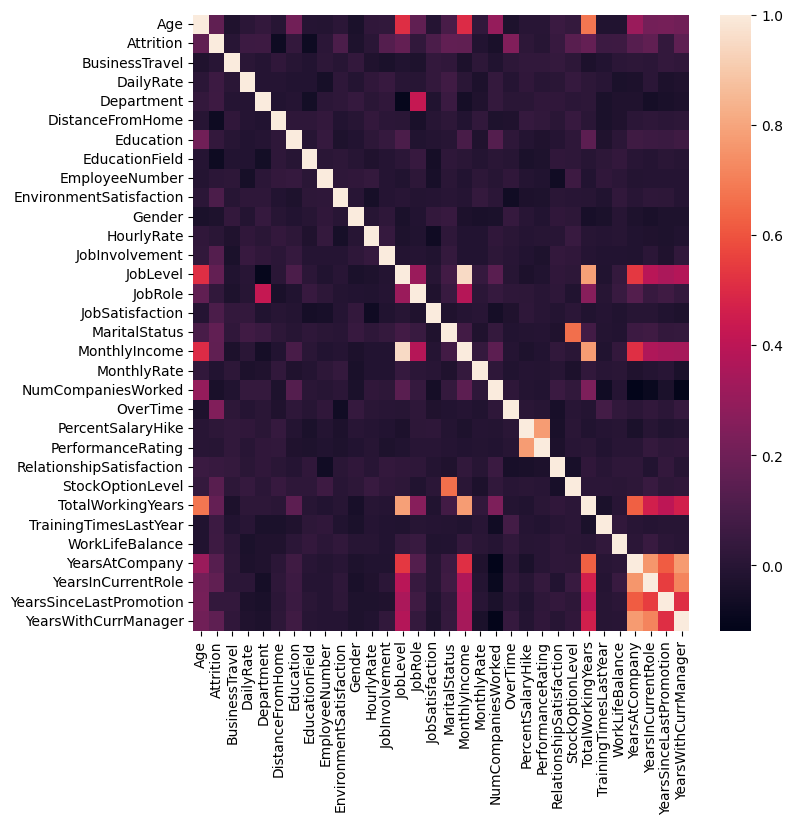

In [34]:
DC.updateDatasetLabelMap()
cols1 = chi_based_columns(DC,targetColumn,k=5)
cols2 = correlation_matrix_based_columns(DC,targetColumn,THRESHOLD=0.15)
DC.updateDatasetLabelMapInv()

In [35]:
print("Columns based on Chi square:", *cols1)
print("Columns based on Correlation:", *cols2)

Columns based on Chi square: DailyRate MonthlyIncome MonthlyRate TotalWorkingYears YearsAtCompany
Columns based on Correlation: Age JobLevel MaritalStatus MonthlyIncome OverTime TotalWorkingYears YearsInCurrentRole YearsWithCurrManager


In [36]:
print("Best Models based on all combination of models and data processing")
MT.results_table.head(20)

Best Models based on all combination of models and data processing


,Model Name,model,data type,normalization,accuracy,precision,recall,f1-score
0,Logistic Regression,LogisticRegression(),pca,scaled,0.857202,0.86077,0.9915,0.921423
1,Logistic Regression,LogisticRegression(),raw,scaled,0.856584,0.861929,0.988103,0.920595
2,MLP,MLPClassifier(),pca,scaled,0.852263,0.864139,0.978042,0.917321
3,Logistic Regression,LogisticRegression(),raw,unscaled,0.847531,0.847217,0.998501,0.916628
4,MLP,MLPClassifier(),tsne,scaled,0.847325,0.856528,0.981766,0.914842
5,MLP,MLPClassifier(),raw,scaled,0.846502,0.861923,0.972483,0.913746
6,SGD Classifier,SGDClassifier(),raw,scaled,0.845473,0.849589,0.993199,0.915597
7,Random Forest,"(DecisionTreeClassifier(max_features='sqrt', r...",raw,unscaled,0.845267,0.866706,0.962789,0.912159
8,SGD Classifier,SGDClassifier(),pca,scaled,0.843621,0.846086,0.995823,0.91471
9,Logistic Regression,LogisticRegression(),pca,unscaled,0.843416,0.843416,1.0,0.915012


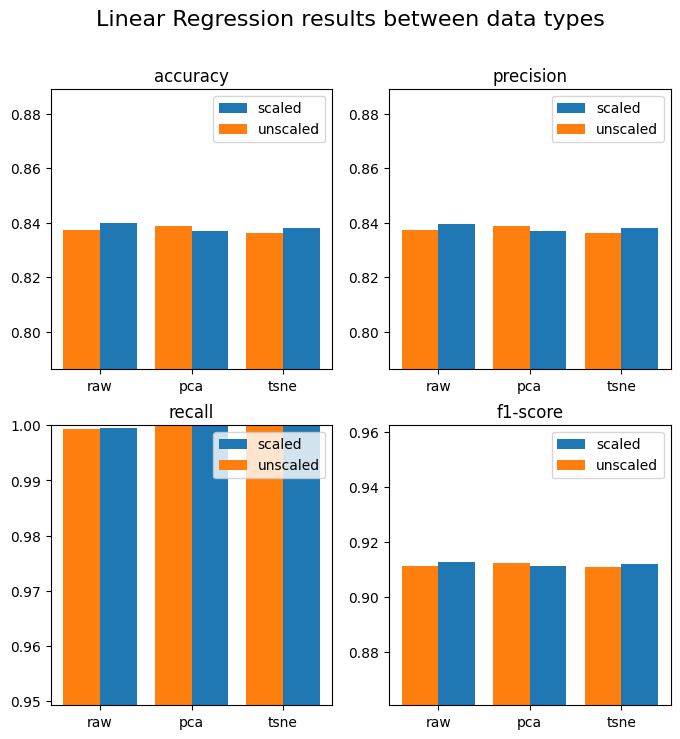

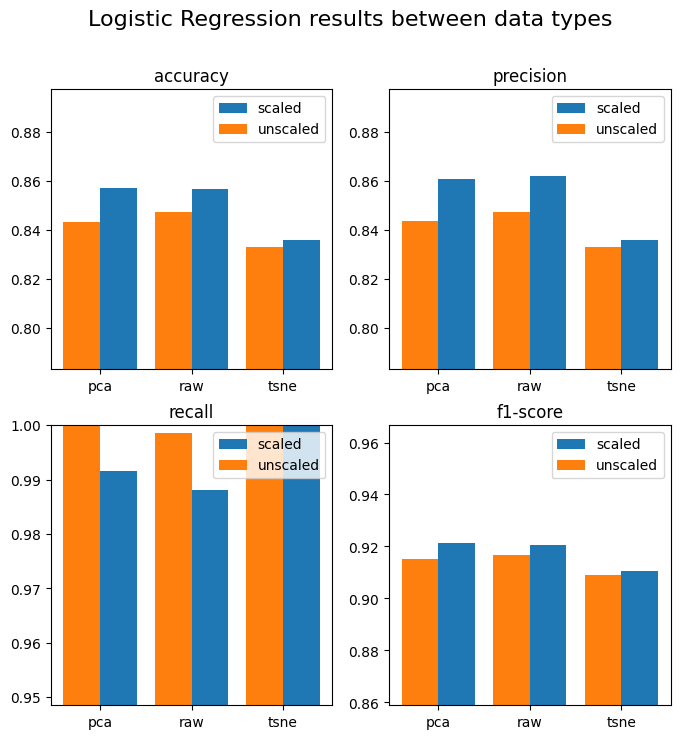

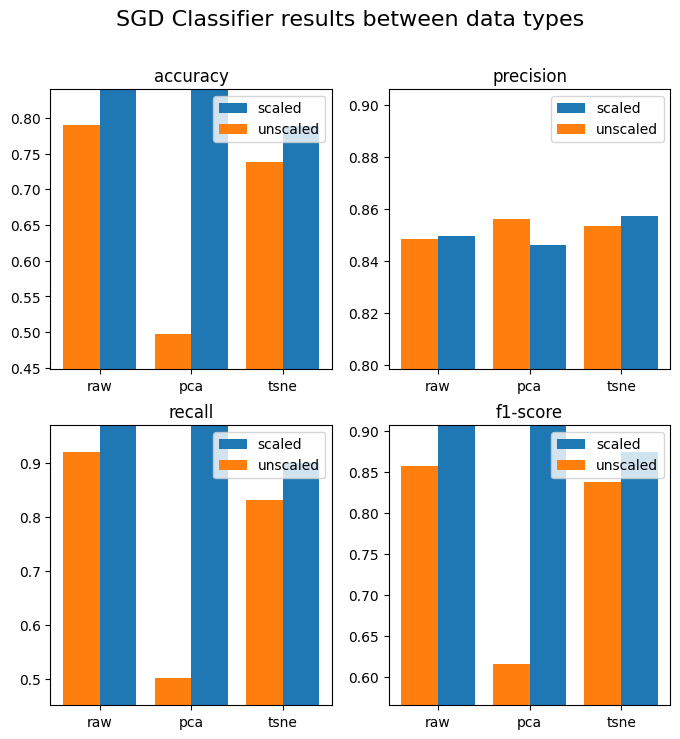

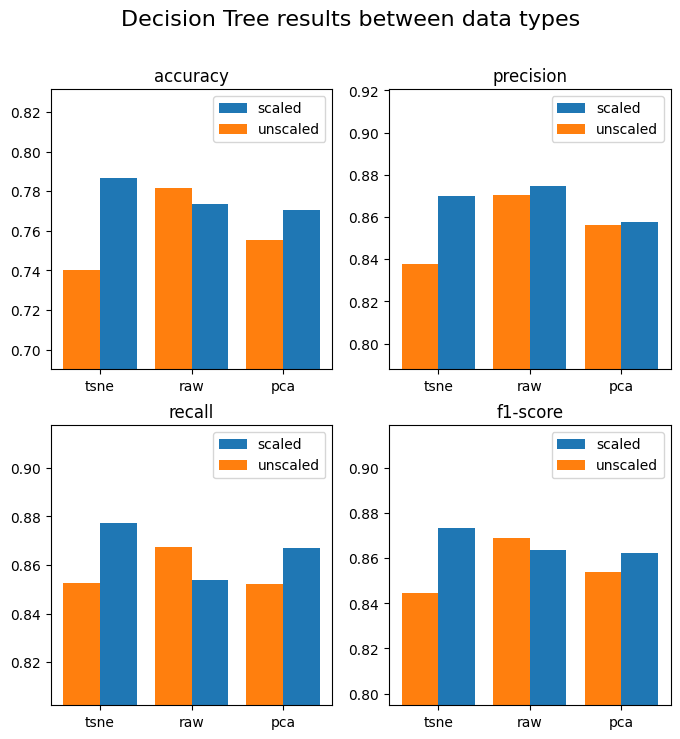

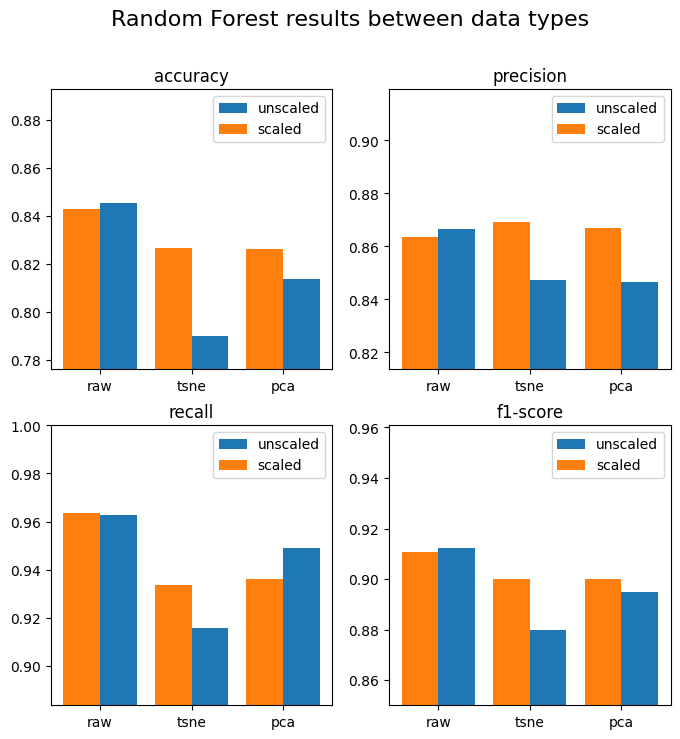

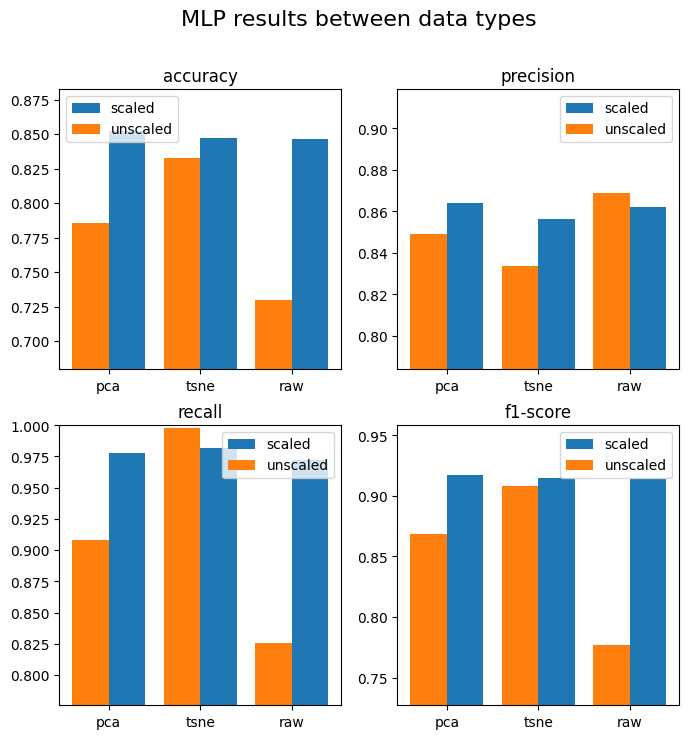

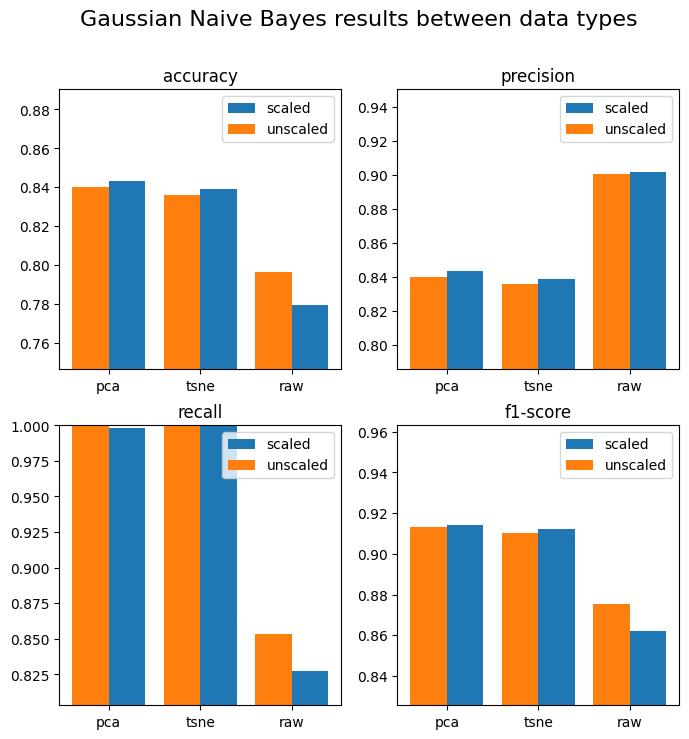

In [37]:
for model in MT.models: # for all the models
  model_table = MT.results_table.loc[MT.results_table['Model Name'] == model].drop('Model Name',axis=1)
  fig, axs = plt.subplots(2,2,figsize=(8,8))
  fig.suptitle(model + " results between data types", fontsize=16)
  for ind,metric in enumerate(MT.metrics):  # for all the metrics
    for i,norm in enumerate(model_table['normalization'].unique()):  # for all normalizations
      val_norm = []
      for datatype in model_table['data type'].unique():  # for all data types
        cond1 = model_table['normalization'] == norm
        temp = model_table.loc[cond1]
        cond2 = model_table['data type'] == datatype
        temp = temp.loc[cond2]
        val_norm.append(temp[metric].values[0])
      x_axis = np.arange(len(model_table['data type'].unique()))
      axs[int(ind/2),ind%2].bar(x_axis +(0.2)*(-1)**i , val_norm, 0.4, label = norm)  # plot the comparitive bar chart
      axs[int(ind/2),ind%2].set_ylim([min(val_norm)-0.05,max(val_norm)+0.05 if max(val_norm) + 0.05 < 1 else 1])
    axs[int(ind/2),ind%2].set_xticks(x_axis, model_table['data type'].unique())
    axs[int(ind/2),ind%2].title.set_text(metric)
    axs[int(ind/2),ind%2].legend()
  plt.show()

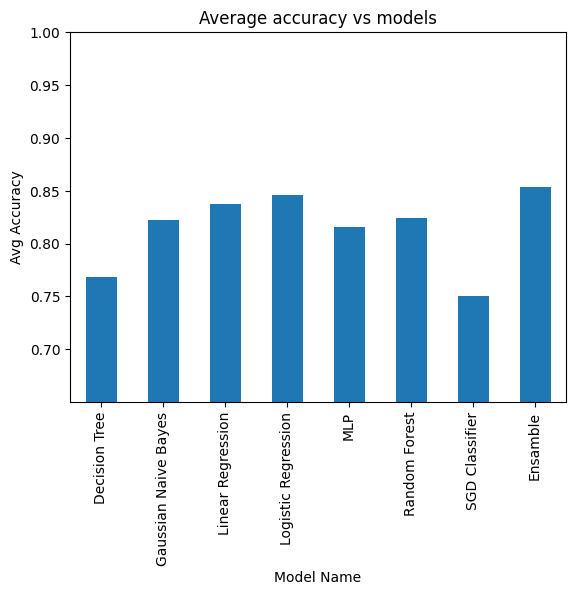

In [38]:
mean_acc = MT.results_table.groupby('Model Name')['accuracy'].mean()
mean_acc['Ensamble'] = EM.evaluate(X_raw,Y.values)['accuracy']
mean_acc.plot(kind='bar', ylabel='Avg Accuracy', title='Average accuracy vs models', ylim = [mean_acc.min()-0.1,1] )
plt.show()